## La couche Internet et le protocole IP

|  couche     | exemple de protocole      |
|:-----------:|:-------------------------:|
| Application |    HTTP, POP, IMAP, ...   |
|  Transport  |       TCP, UDP, ...       |
| **Internet**|   **IPv4, IPv6, ICMP**, ...   |
| Liaison     |    Ethernet, Wi-Fi, ...   |

Cette couche s'intéresse à la communication entre deux machines qui peuvent **appartenir à des réseaux locaux différents**.

### Adresses IP

En premier lieu, le protocole IP, permet d'associer à chaque *interface* de chaque machine un identifiant unique appelée **adresse IP**.

Dans la version 4 de ce protocole, l'adresse IP est représentée par **4 octets**, usuellement notés en décimal (donc entre 0 et 255 pour chaque octet) et séparés par des points, par exemple «`149.91.82.226`».

L'adresse IP `127.0.0.1` (de nom symbolique **localhost**) est particulière puisqu'elle correspond toujours à la machine sur laquelle on se trouve, plus précisément à son interface virtuelle appelée **lo** (pour *loopback* - boucle locale). 

#### À tester - `ping`

la commande `ping <ip>` permet de tester qu'une machine distante est bien accessible depuis notre machine.

Elle envoie de manière itérative à la machine cible - ping - un petit paquet de données. Si la machine est connectée, elle répond - pong - par un petit paquet de réponse. Le processus recommence toutes les secondes, `Ctrl+C` permet de l'interrompre et d'afficher les statistiques de la transmission.

```
$ ping 149.91.82.226
PING 149.91.82.226 (149.91.82.226) 56(84) bytes of data.
64 bytes from 149.91.82.226: icmp_seq=1 ttl=51 time=27.2 ms
64 bytes from 149.91.82.226: icmp_seq=2 ttl=51 time=24.5 ms
64 bytes from 149.91.82.226: icmp_seq=3 ttl=51 time=27.4 ms
^C
--- 149.91.82.226 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2004ms
rtt min/avg/max/mdev = 24.524/26.424/27.455/1.358 ms
```

### Masque de sous-réseau - *netmask*

Afin de pouvoir diviser finement les adresses, IP définit la notion d'**adresse de sous-réseau**.

En pratique, une machine possède à la fois une adresse IP et un **masque de sous-réseau** qui sert à découper une adresse IP en deux parties: la **partie réseau** et la **partie «machine» ou hôte**. 

Un masque de sous réseau est un motif binaire de 4 octets (comme une adresse IP) de la forme 1...10...0.

Par exemple, un **masque** *valide* est 255.255.248.0 qui correspond à la suite de bits

    binaire  11111111 . 11111111 . 11111000 . 0000000
    décimal     255   .    255   .    248   .    0   

Pour obtenir la partie réseau d'une adresse, on réalise un **ET logique**, bit à bit, entre le masque et l'adresse IP:

    adresse: 192.168.129.10 ---> 11000000 10101000 10000001 00001010
    masque:  255.255.248.0  ---> 11111111 11111111 11111000 00000000
                                 -----------------------------------
    ET logique bit à bit (&)     11000000 10101000 10000000 00000000
    qui donne                       192      168      128      0

On obtient ainsi l'adresse IP du réseau local `192.168.128.0` dans lequel se trouve la machine d'IP `192.168.129.10`.

La partie hôte s'obtient en inversant les bits du masque et en appliquant de nouveau un ET bit à bit: on obtient `0..01 00001010` c'est à dire l'adresse `0.0.1.10` qui est l'adresse de la machine **dans** le sous réseau `192.168.128.0`.

La plupart du temps, les masques de sous-réseau sont plus simples comme `255.255.255.0`.

**Question**: En utilisant `ifconfig` donner le masque de sous-réseau du serveur jupyterhub. En déduire l'adresse IP de son sous-réseau.

On rencontre souvent une notation abrégée comme `192.168.129.10 /21` pour exprimer que les 21 bits de poids forts forment l'adresse réseau...

**Exercices python pour les volontaires - niveau difficile**

Compléter et tester les fonctions qui suivent:

In [ ]:
def masque_valide(masque):
    "renvoie True ou False selon que le masque - str - est valide ou non"
    
    nbs = [int(d) for d in masque.___]
    for nb in nbs:
        if nb == ___:
            continue
        else:
            if nb == 0: return ___
            bits = bin(nb)[___:]
            if len(bits) < 8: return ___
            i = bits.index(___)
            for b in bits[i:]:
                if b == ___:
                    return ___
    return ___

In [ ]:
def masque_valide(masque):
    "renvoie True ou False selon que le masque - str - est valide ou non"
    
    nbs = [int(d) for d in masque.split('.')]
    for nb in nbs:
        if nb == 255:
            continue
        else:
            if nb == 0: return True
            bits = bin(nb)[2:]
            if len(bits) < 8: return False
            i = bits.index('0')
            for b in bits[i:]:
                if b == '1':
                    return False
    return True

assert masque_valide('255.255.255.0')
assert not masque_valide('255.255.127.0')
assert masque_valide('255.255.248.0')

In [ ]:
def adresse_reseau(ip, masque):
    """renvoie l'adresse de réseau (str)
    de l'hôte ayant l'adresse IP et le masque de sous réseau 
    fournies en arguments (str aussi)"""
    
    return '.'.___(
        map( # tester res = map(lambda x: x**2, [3, 4, 5]), puis list(res)
            ___,
            # entier1 & entier2 produit l'entier correspondant au
            #  motif binaire obtenu en appliquant un ET bit à bit
            # à ceux de entier1 et entier2.
            [___(a) & ___(b) for a, b in zip(adr.___, masque.___))]
        )
    )

assert adr_sous_reseau('192.168.129.10', '255.255.248.0') == '192.168.128.0'

In [ ]:
def adresse_reseau(ip, masque):
    """renvoie l'adresse de réseau (str)
    de l'hôte ayant l'adresse IP et le masque de sous réseau 
    fournies en arguments (str aussi)"""
    
    return '.'.join(
        map(
            str,
            [int(a) & int(b) for a, b in zip(ip.split('.'), masque.split('.'))]
        )
    )

assert adr_sous_reseau('192.168.129.10', '255.255.248.0') == '192.168.128.0'

### Routage

Le protocole IP assure le **routage** c'est-à-dire la transmission de proche en proche des données depuis l'émetteur jusqu'à la destination finale.

En effet, les machines du réseau internet n'étant pas *directement* connectées les unes autres, le protocole permet de définir comment acheminer les données.

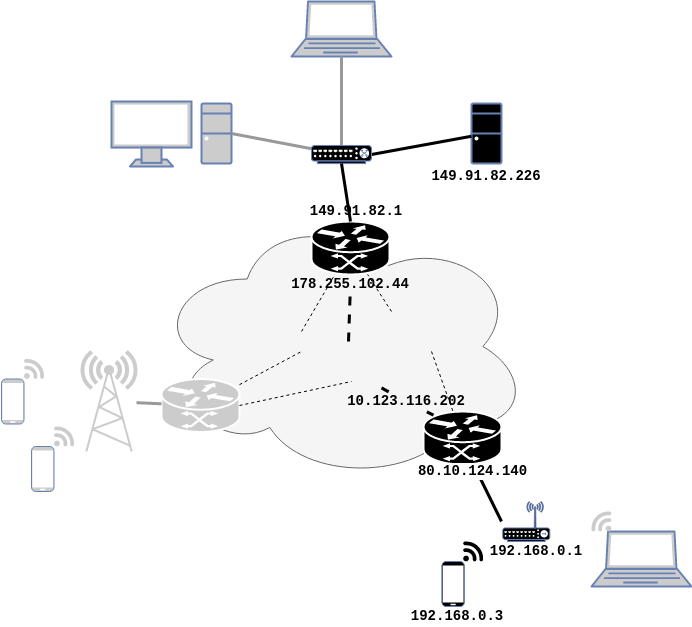

#### Passerelle ou routeur (*gateway*) 

Parmi les machines d'un sous-réseau, l'une au moins joue un rôle particulier: la **passerelle** (*gateaway*) ou **routeur**

Une **passerelle** est une machine possédant *au moins* **deux** *interfaces réseau* chacune connectée à un sous-réseau différent.

#### À tester - `traceroute`

La commande `traceroute ip` affiche les ip des différents routeurs (celle de leurs interface) rencontrées pour acheminer des données jusqu'à la machine d'ip donnée.

Une passerelle ou routeur possède une **table de routage** qui fait correspondre à chaque interface réseau la liste des adresses joignables via celle-ci.

#### À tester - `route`

La commande `route -n` (l'option `-n` pour afficher les adresses sous forme numérique) affiche la table de routage de la machine sur laquelle on l'exécute. Toute machine possède une mini table de routage pour s'y retrouver dans son réseau local.

Description informelle du routage de l'information:

- **si** la machine cible fait partie du même sous-réseau que la machine source: elle lui envoie *directement* (en utilisant la couche ethernet...) l'information,
- **sinon**:
    - la machine source envoie les données à sa *passerelle par défaut* (celle de son sous-réseau),
    - la passerelle examine alors l'adresse de destination:
        - **si** elle correspond à un sous-réseau qui lui est directement relié, elle transmet *directement* l'information,
        - **sinon si** sa table de routage indique le prochain routeur à joindre, elle lui transmet l'information,
        - **sinon** elle envoie l'information vers l'un des routeurs qui a été définie par défaut,
            - ... 

### Paquet IP

Pour mener à bien ce processus de routage, IP définit la notion de **paquet IP** dont voici approximativement la structure:

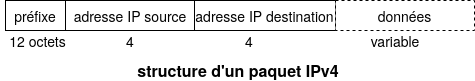

Le préfixe contient (entre autre!):
- la longueur totale du paquet (typiquement 1500 octets),
- un entier sur un octet appelé **TTL** (*Time To Live*).

Détaillons un peu: 
1. lorsque la machine source émet des données, elle les place dans un paquet IP lui-même encapsulé dans une trame - *frame* - ethernet (ou autre), puis l'émet sur le réseau local 

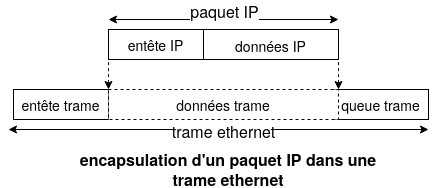

2. lorsque (l'interface de ) la  passerelle reçoit cette trame, elle extrait le paquet IP:
    - lit son adresse *IP destination* afin de pouvoir choisir l'interface adéquate,
    - lit son TTL et le décrémente d'une unité,
    - elle encapsule alors de nouveau le paquet IP dans une trame et l'émet sur l'interface adéquate.
3. le processus recommence à chaque routeur.

Si à un moment dans tout ce processus le TTL prend la valeur 0, le routeur qui reçoit le paquet le détruit. Cela permet notamment d'éviter que le paquet ne reste trop longtemps en transfert dans le réseau.

<p style="text-align: center;"><a href="2_couches_transport_et_application.ipynb">... SUITE - les couches transport et application ...</a></p>